In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer, StandardScaler

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn import metrics

# For distribution
from statsmodels.graphics.gofplots import qqplot

In [4]:
df = pd.read_csv('http://bit.ly/GlassDatasetB')
df

,1,1.51824,12.87,3.48,1.29,72.95,0.6,8.43,0,0.1,1.1
0,2,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,1
1,3,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,1
2,4,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
3,5,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,1
4,6,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1
...,...,...,...,...,...,...,...,...,...,...,...
194,196,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,2
195,197,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,1
196,198,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
197,199,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00,1


In [6]:
df['1.1'].unique()

array([1, 2])

In [7]:
df = df.drop(['1'], axis=1)

In [8]:
df.head(
)

,1.51824,12.87,3.48,1.29,72.95,0.6,8.43,0,0.1,1.1
0,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,1
1,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00,1
2,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,1
3,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,1
4,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,1


In [15]:
from statsmodels.graphics.gofplots import qqplot

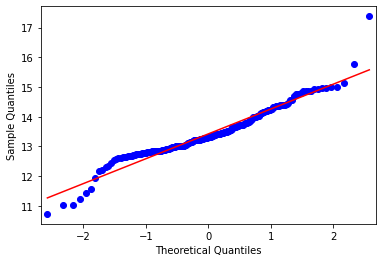

In [36]:
qqplot(df['12.87'], line='s')
plt.show()

In [28]:
X = df.loc[:, '1.51824' : '0.1'].values
y = df['1.1'].values

features = df.loc[:, '1.51824' : '0.1']
features

,1.51824,12.87,3.48,1.29,72.95,0.6,8.43,0,0.1
0,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00
1,1.51747,12.84,3.50,1.14,73.27,0.56,8.55,0.00,0.00
2,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22
3,1.51768,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14
4,1.51769,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24
...,...,...,...,...,...,...,...,...,...
194,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00
195,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
196,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
197,1.51905,13.60,3.62,1.11,72.64,0.14,8.76,0.00,0.00


In [19]:
multi = GaussianNB().fit(X, y)

In [20]:
y_pred = multi.predict(X)

In [21]:
metrics.accuracy_score(y, y_pred)

0.9095477386934674

## Attempting to improve model performance

## Normalization

In [24]:
normalize = Normalizer()

X = normalize.fit_transform(X)
print(X)

[[0.02051253 0.18008853 0.04512346 ... 0.12145505 0.         0.        ]
 [0.0202372  0.17123612 0.04667651 ... 0.11402405 0.         0.        ]
 [0.02031924 0.17203248 0.04658934 ... 0.11459907 0.0012049  0.0029453 ]
 ...
 [0.0205755  0.17981613 0.04836527 ... 0.13739519 0.         0.0004053 ]
 [0.02038134 0.18247341 0.04857013 ... 0.11753434 0.         0.        ]
 [0.02059645 0.19228029 0.0516897  ... 0.12949489 0.         0.        ]]


In [26]:
# Try running the NB model and see if performance is better or nah
nb = GaussianNB().fit(X, y)

y_pred_2 = nb.predict(X)

print('Accuracy : ', metrics.accuracy_score(y, y_pred_2))
print(metrics.classification_report(y, y_pred_2))

Accuracy :  0.9045226130653267
              precision    recall  f1-score   support

           1       0.93      0.94      0.94       148
           2       0.82      0.80      0.81        51

    accuracy                           0.90       199
   macro avg       0.88      0.87      0.87       199
weighted avg       0.90      0.90      0.90       199



Model is abit poorer after normalization

## Correlation

In [30]:
features.corr().abs()

,1.51824,12.87,3.48,1.29,72.95,0.6,8.43,0,0.1
1.51824,1.000000,0.201670,0.118135,0.407114,0.540410,0.287152,0.809884,0.004884,0.135470
12.87,0.201670,1.000000,0.269264,0.157219,0.055776,0.266436,0.287681,0.324165,0.249866
3.48,0.118135,0.269264,1.000000,0.481746,0.173148,0.001660,0.437636,0.485865,0.097376
1.29,0.407114,0.157219,0.481746,1.000000,0.008209,0.327458,0.263714,0.480002,0.078642
72.95,0.540410,0.055776,0.173148,0.008209,1.000000,0.199344,0.202978,0.101270,0.090874
0.6,0.287152,0.266436,0.001660,0.327458,0.199344,1.000000,0.315718,0.040466,0.002000
8.43,0.809884,0.287681,0.437636,0.263714,0.202978,0.315718,1.000000,0.123784,0.112986
0,0.004884,0.324165,0.485865,0.480002,0.101270,0.040466,0.123784,1.000000,0.066459
0.1,0.135470,0.249866,0.097376,0.078642,0.090874,0.002000,0.112986,0.066459,1.000000


<AxesSubplot:>

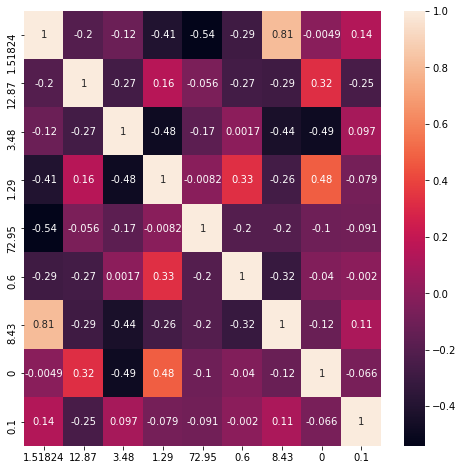

In [35]:
# Heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(features.corr(), annot=True, cmap=)

In [44]:
threshold = 0.8


corr = features.corr().abs()

#upper triangle
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

upper


,1.51824,12.87,3.48,1.29,72.95,0.6,8.43,0,0.1
1.51824,NaN,0.20167,0.118135,0.407114,0.540410,0.287152,0.809884,0.004884,0.135470
12.87,NaN,NaN,0.269264,0.157219,0.055776,0.266436,0.287681,0.324165,0.249866
3.48,NaN,NaN,NaN,0.481746,0.173148,0.001660,0.437636,0.485865,0.097376
1.29,NaN,NaN,NaN,NaN,0.008209,0.327458,0.263714,0.480002,0.078642
72.95,NaN,NaN,NaN,NaN,NaN,0.199344,0.202978,0.101270,0.090874
0.6,NaN,NaN,NaN,NaN,NaN,NaN,0.315718,0.040466,0.002000
8.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.123784,0.112986
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066459
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Finding index of features higher than threshhold and dropping them
col_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
col_to_drop

['8.43']

Will drop 8.43

In [46]:
features = features.drop(features[col_to_drop], axis=1)

In [47]:
features.corr()

,1.51824,12.87,3.48,1.29,72.95,0.6,0,0.1
1.51824,1.000000,-0.201670,-0.118135,-0.407114,-0.540410,-0.287152,-0.004884,0.135470
12.87,-0.201670,1.000000,-0.269264,0.157219,-0.055776,-0.266436,0.324165,-0.249866
3.48,-0.118135,-0.269264,1.000000,-0.481746,-0.173148,0.001660,-0.485865,0.097376
1.29,-0.407114,0.157219,-0.481746,1.000000,-0.008209,0.327458,0.480002,-0.078642
72.95,-0.540410,-0.055776,-0.173148,-0.008209,1.000000,-0.199344,-0.101270,-0.090874
0.6,-0.287152,-0.266436,0.001660,0.327458,-0.199344,1.000000,-0.040466,-0.002000
0,-0.004884,0.324165,-0.485865,0.480002,-0.101270,-0.040466,1.000000,-0.066459
0.1,0.135470,-0.249866,0.097376,-0.078642,-0.090874,-0.002000,-0.066459,1.000000


In [48]:
X3 = features.values
y = y

In [51]:
nb = GaussianNB().fit(X3, y)

y_pred_3 = nb.predict(X3)

print('Accuracy : ', metrics.accuracy_score(y, y_pred_3))
print(metrics.classification_report(y, y_pred_3))

Accuracy :  0.9095477386934674
              precision    recall  f1-score   support

           1       0.92      0.96      0.94       148
           2       0.87      0.76      0.81        51

    accuracy                           0.91       199
   macro avg       0.89      0.86      0.88       199
weighted avg       0.91      0.91      0.91       199

